## In this script I a am trying to use selection of FP annot all.

## The best could be equal proportion for folder and for categories

In [1]:
#Encore filtrer classe 
#Faire simu avec les x et test
#Refaire le code un peu propre
#Enregistrer les meilleurs simus de neurones

#Intégrer ça dans le truc automatique

#Essayer de passer par une boucle où supprime les images au fur et à mesure
#/Changer liste_name_test pour éviter les doublons et que les images s'ouvrent ou s'enregistren plusieurs fois.

#Si on fait une boucle il faut tout casser


##Rajouter les fp



import ast
import os
from os import chdir
from os.path import basename, join
import cv2
from imutils import grab_contours
import pandas as pd
import numpy as np
import gc
import time
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import tensorflow


from keras.models import Sequential
from keras.layers import Dense, Activation,GlobalAveragePooling2D, MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.models import Model
import cv2

from numpy import save
from numpy import load

from sklearn import metrics

import matplotlib.pyplot as plt
import pickle

Using TensorFlow backend.


In [2]:
liste_animals=["autre","chevreuil","corneille","faisan","lapin","pigeon"]

In [85]:
#Il faut rajouter le chemin cad




def nn(dropout_rate):    
    
    lenet = Sequential()

    conv_1 = Conv2D(filters = 30,                     # Nombre de filtres
                kernel_size = (5, 5),            # Dimensions du noyau
                padding = 'valid',               # Mode de Dépassement
                input_shape = (28, 28, 4),       # Dimensions de l'image en entrée
                activation = 'relu')             # Fonction d'activation

    max_pool_1 = MaxPooling2D(pool_size = (2, 2))

    conv_2 = Conv2D(filters = 16,                    
                kernel_size = (3, 3),          
                padding = 'valid',             
                activation = 'relu')

    max_pool_2 = MaxPooling2D(pool_size = (2, 2))

    flatten = Flatten()

    dropout = Dropout(rate = dropout_rate)

    dense_1 = Dense(units = 128,
                activation = 'relu')

    dense_2 = Dense(units = 6,
                activation = 'softmax')

    lenet.add(conv_1)
    lenet.add(max_pool_1)
    lenet.add(conv_2)
    lenet.add(max_pool_2)
    lenet.add(dropout)
    lenet.add(flatten)
    lenet.add(dense_1)
    lenet.add(dense_2)



    
    
    
    lenet.compile(loss='sparse_categorical_crossentropy',  # fonction de perte
              optimizer='adam',                 # algorithme de descente de gradient
              metrics=['accuracy'])             # métrique d'évaluation
    
    return lenet

def concatenate_X_Y(X,Y,category,liste_array):
    array=np.array(liste_array)
    if len(array)!=0:
        X=np.concatenate((array, X), axis=0)

        liste_fp = [category] * len(array)
        Y=liste_fp+Y
        
    return X,Y



def add_list(specific_animal_liste,animals_paths):
    liste_array=[]
    for image in specific_animal_liste:
        with open(animals_paths+image, "rb") as fp:   # Unpickling
            liste_image = pickle.load(fp)
        liste_array=liste_array+liste_image
    return liste_array



def fill_animals_listes(liste_animals):
    corbeaux_liste,pigeons_liste,faisans_liste,lapins_liste,chevreuils_liste=([] for i in range(5))



    for image in liste_animals:
        if image.split("_")[-1]=="corbeau.txt":
            corbeaux_liste.append(image)
        if image.split("_")[-1]=="pigeon.txt":
            pigeons_liste.append(image)
        if image.split("_")[-1]=="faisan.txt":
            faisans_liste.append(image)        
        if image.split("_")[-1]=="lapin.txt":
            lapins_liste.append(image)        
        if image.split("_")[-1]=="chevreuil.txt":
            chevreuils_liste.append(image)   
    return corbeaux_liste,pigeons_liste,faisans_liste,lapins_liste,chevreuils_liste



def open_fp(fp_path):

    #liste_fp=["image_2019-04-18_18-40-08__fp.txt","image_2019-04-18_18-49-53__fp.txt"]
    list_of_list_fp=os.listdir(fp_path)
    print("nb im",len(list_of_list_fp))
    liste_fp=[]
    for FP in list_of_list_fp:
        with open(fp_path+FP, "rb") as fp:   # Unpickling
            liste_fp_image = pickle.load(fp)
            print(liste_fp_image)
    liste_fp+=liste_fp_image
    return liste_fp


def open_fp(fp_path):
    list_of_list_fp=os.listdir(fp_path)
    liste_fp=[]
    for fp in list_of_list_fp:
        with open(fp_path+fp, "rb") as fp:   # Unpickling
            liste1fp = pickle.load(fp)
        liste_fp=liste_fp+liste1fp
    print(len(liste_fp))
    return liste_fp






def get_an_list_batch(animals_paths_fold):
    corbeaux_liste,pigeons_liste,faisans_liste,lapins_liste,chevreuils_liste=([] for i in range(5))
    
    liste_animals=os.listdir(animals_paths_fold)
    corbeaux_liste_this_fold,pigeons_liste_this_fold,faisans_liste_this_fold,lapins_liste_this_fold,chevreuils_liste_this_fold=fill_animals_listes(liste_animals)
    corbeaux_liste+=corbeaux_liste_this_fold
    pigeons_liste+=pigeons_liste_this_fold
    faisans_liste+=faisans_liste_this_fold
    lapins_liste+=lapins_liste_this_fold
    chevreuils_liste+=chevreuils_liste_this_fold
    
    liste_array_corbeaux=add_list(corbeaux_liste,animals_paths_fold)
    liste_array_pigeons=add_list(pigeons_liste,animals_paths_fold)
    liste_array_faisans=add_list(faisans_liste,animals_paths_fold)
    liste_array_lapins=add_list(lapins_liste,animals_paths_fold)
    liste_array_chevreuils=add_list(chevreuils_liste,animals_paths_fold)
    return liste_array_corbeaux,liste_array_pigeons,liste_array_faisans,liste_array_lapins,liste_array_chevreuils

## Get X and Y

In [94]:
path_to_save='/mnt/VegaSlowDataDisk/c3po_interface_mark/Materiels/4D_Pictures/Alex_db/HSV_Pictures/'
>>> with open(path_to_save+"Y_test_Alex_db.txt", "rb") as fp:   # Unpickling
...   Y_test = pickle.load(fp)

>>> with open(path_to_save+"Y_train_Alex_db.txt", "rb") as fp:   # Unpickling
...   Y_train = pickle.load(fp)


X_test=np.load('/mnt/VegaSlowDataDisk/c3po_interface_mark/Materiels/4D_Pictures/Alex_db/HSV_Pictures/X_test_HSV.dat')
X_train=np.load('/mnt/VegaSlowDataDisk/c3po_interface_mark/Materiels/4D_Pictures/Alex_db/HSV_Pictures/X_train_HSV.dat')

In [95]:
X=np.concatenate((X_train,X_test),axis=0)
Y=Y_train+Y_test

## ADD FP 

In [97]:

path_folders="/mnt/VegaSlowDataDisk/c3po_interface_mark/Materiels/4D_Pictures/FP/200ep_HSV_6CL_4CH_liste_fp/"

fp_path=path_folders+"dossier0/"
liste_fp_0=open_fp(fp_path)

fp_path=path_folders+"dossier1/"
liste_fp_1=open_fp(fp_path)

fp_path=path_folders+"dossier2/"
liste_fp_2=open_fp(fp_path)

fp_path=path_folders+"dossier3/"
liste_fp_3=open_fp(fp_path)

fp_path=path_folders+"dossier4/"
liste_fp_4=open_fp(fp_path)


liste_fp=liste_fp_0+liste_fp_1+liste_fp_2+liste_fp_3+liste_fp_4
array_fp=np.array(liste_fp)

array_train,array_test=train_test_split(array_fp,test_size=0.2,random_state=42)


1344
10196
3582
13506
13399


In [98]:
X=np.concatenate((array_test, X), axis=0)
y_to_add = [0] * len(array_test)
Y=y_to_add+Y

## ADD animals

In [99]:

animals_paths_rep="/mnt/VegaSlowDataDisk/c3po_interface_mark/Materiels/4D_Pictures/animals_match/"
animals_paths_fold=animals_paths_rep+"dossier4/"

liste_dossiers=["dossier0/","dossier1/","dossier2/","dossier3/","dossier4/"]
liste_array_corbeaux,liste_array_pigeons,liste_array_faisans,liste_array_lapins,liste_array_chevreuils=([] for i in range(5))

for dossier in liste_dossiers:
    animals_paths_fold=animals_paths_rep+dossier
    liste_array_corbeaux_this_fold,liste_array_pigeons_this_fold,liste_array_faisans_this_fold,liste_array_lapins_this_fold,liste_array_chevreuils_this_fold=get_an_list_batch(animals_paths_fold)
    
    liste_array_corbeaux+=liste_array_corbeaux_this_fold
    liste_array_pigeons+=liste_array_pigeons_this_fold
    liste_array_faisans+=liste_array_faisans_this_fold
    liste_array_lapins+=liste_array_lapins_this_fold
    liste_array_chevreuils+=liste_array_chevreuils_this_fold
    

## Get animals

## Get train and test sets

In [101]:

#concatenate_X_Y(X,Y,category,liste_array)



map_listes_names={"pigeon":[liste_array_pigeons,5],"corbeau":[liste_array_corbeaux,2],"chevreuil":[liste_array_chevreuils,1],
                     "faisan":[liste_array_faisans,3],"lapin":[liste_array_lapins,4]}



for animal in map_listes_names.keys():
    category=map_listes_names[animal][1]
    liste_array=map_listes_names[animal][0]
    X,Y=concatenate_X_Y(X,Y,category,liste_array)


In [102]:
indices=list(range(len(Y)))
Y_train,Y_test,indices_train,indices_test=train_test_split(Y,indices,stratify=Y,test_size=0.2,random_state=42)

X_train=[X[i] for i in indices_train]
X_test=[X[i] for i in indices_test]

X_train=np.array(X_train)
X_test=np.array(X_test)

## Train_models

              precision    recall  f1-score   support

           0    0.99334   0.87018   0.92769     10461
           1    0.02841   1.00000   0.05525         5
           2    0.79390   0.89872   0.84307      1333
           3    0.25260   0.67361   0.36742       144
           4    0.03182   0.46667   0.05957        15
           5    0.39786   0.86512   0.54505       430

    accuracy                        0.87036     12388
   macro avg    0.41632   0.79572   0.46634     12388
weighted avg    0.94105   0.87036   0.89739     12388



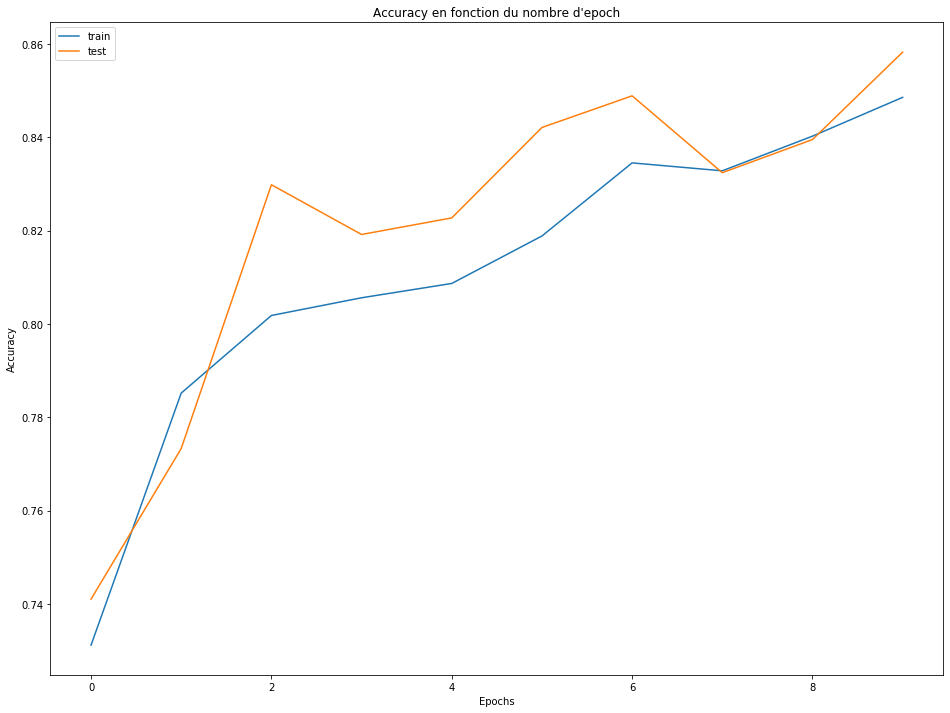

In [103]:
lenet=nn(0.3)
#seed(1)
tensorflow.random.set_seed(2)
#history=lenet.fit(X_train,Y_train,epochs=2,verbose=1)
history=lenet.fit(X_train,Y_train,validation_data=(X_test, Y_test),  epochs=10,verbose=0)


plt.figure(figsize=(16,12))

plt.plot(history.history['accuracy'],label="train");
plt.plot(history.history['val_accuracy'],label="test");
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy en fonction du nombre d'epoch");
plt.legend();

Y_predict=lenet.predict(X_train).argmax(axis=1)
print(metrics.classification_report(Y_predict,Y_train,digits=5))

In [105]:
model_path_to_save="/mnt/VegaSlowDataDisk/c3po_interface_mark/Materiels/Models/4Chanels_6Classes/all_fp+all_birds/"
lenet.save(model_path_to_save+'10ep_0.1dpt_HSV__6CL_4CH_half_fp_birds_matched')

              precision    recall  f1-score   support

           0    0.99422   0.96392   0.97884      9452
           1    0.74432   0.94245   0.83175       139
           2    0.93903   0.95357   0.94624      1486
           3    0.83594   0.93860   0.88430       342
           4    0.75909   0.86979   0.81068       192
           5    0.80963   0.97426   0.88435       777

    accuracy                        0.96093     12388
   macro avg    0.84704   0.94043   0.88936     12388
weighted avg    0.96520   0.96093   0.96213     12388



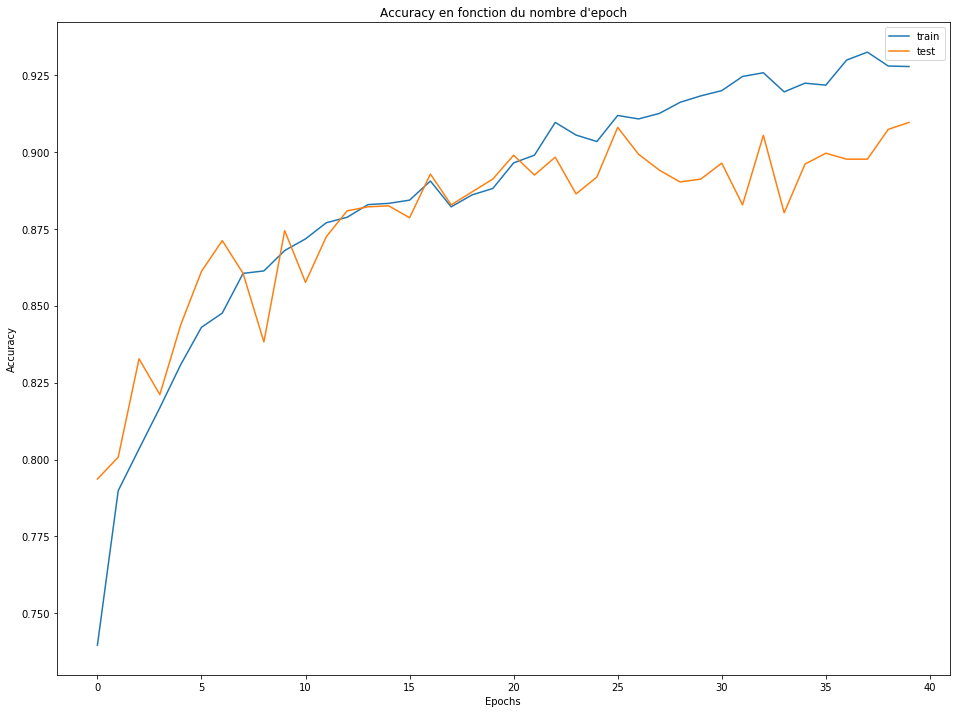

In [110]:
lenet=nn(0.3)
#seed(1)
tensorflow.random.set_seed(2)
#history=lenet.fit(X_train,Y_train,epochs=2,verbose=1)
history=lenet.fit(X_train,Y_train,validation_data=(X_test, Y_test),  epochs=40,verbose=0)


plt.figure(figsize=(16,12))

plt.plot(history.history['accuracy'],label="train");
plt.plot(history.history['val_accuracy'],label="test");
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy en fonction du nombre d'epoch");
plt.legend();

Y_predict=lenet.predict(X_train).argmax(axis=1)
print(metrics.classification_report(Y_predict,Y_train,digits=5))

In [111]:
model_path_to_save="/mnt/VegaSlowDataDisk/c3po_interface_mark/Materiels/Models/4Chanels_6Classes/all_fp+all_birds/"
lenet.save(model_path_to_save+'40ep_0.3dpt_HSV_6CL_4CH_small_fp_birds_matched')

              precision    recall  f1-score   support

           0    0.99616   0.99340   0.99478     15151
           1    0.82243   0.83019   0.82629       106
           2    0.96947   0.89858   0.93268       848
           3    0.81081   0.97222   0.88421       216
           4    0.81618   0.82222   0.81919       135
           5    0.83433   0.94570   0.88653       442

    accuracy                        0.98473     16898
   macro avg    0.87490   0.91039   0.89061     16898
weighted avg    0.98569   0.98473   0.98496     16898



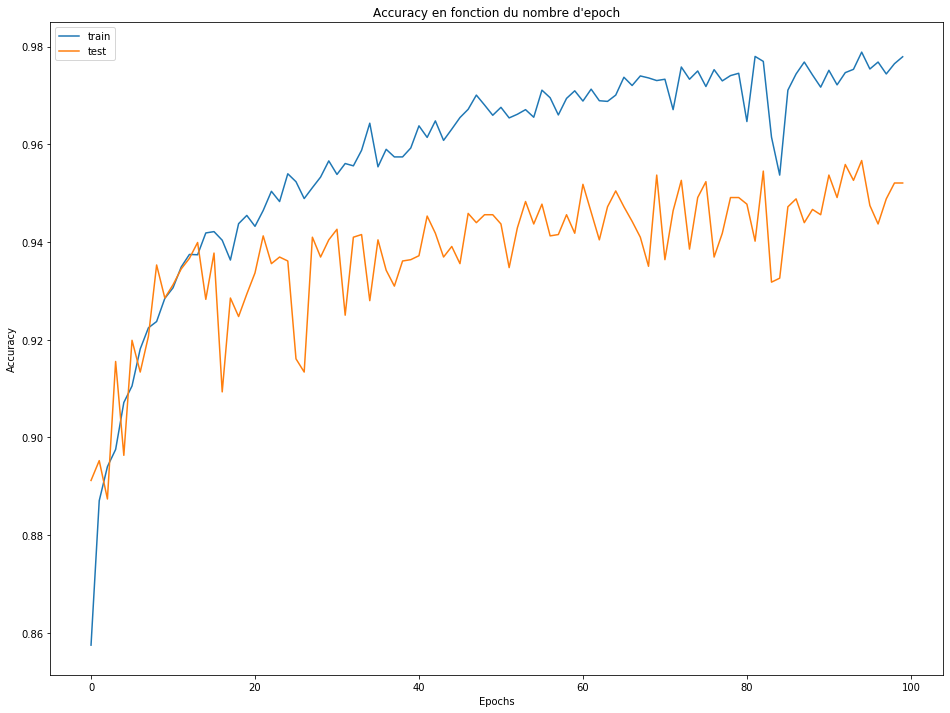

In [182]:
lenet=nn(0.1)
#seed(1)
tensorflow.random.set_seed(2)
#history=lenet.fit(X_train,Y_train,epochs=2,verbose=1)
history=lenet.fit(X_train,Y_train,validation_data=(X_test, Y_test),  epochs=100,verbose=0)


plt.figure(figsize=(16,12))

plt.plot(history.history['accuracy'],label="train");
plt.plot(history.history['val_accuracy'],label="test");
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy en fonction du nombre d'epoch");
plt.legend();


Y_predict=lenet.predict(X_train_new).argmax(axis=1)
print(metrics.classification_report(Y_predict,Y_train_new,digits=5))


In [183]:
model_path_to_save="/mnt/VegaSlowDataDisk/c3po_interface_mark/Materiels/Models/4Chanels_6Classes/birds_fp_matched/"
lenet.save(model_path_to_save+'10ep_0.3dpt_HSV_6CL_4CH_smal_fp_birds_matched')
#concatenate_X_Y(X_train,Y_train,2,corbeaux_liste)


In [109]:
#liste_array_corbeaux


(3097, 28, 28, 4)

In [115]:
a1 = np.array([1, 2, 3])
a2 = np.array([3, 4, 5])
a3 = np.array([2, 4, 6])
A = np.array([a1, a2, a3])

b1 = np.array([3, 2, 1])
b2 = np.array([3, 4, 5])
b3 = np.array([6, 4, 2])
B = np.array([b1, b2, b3])

def compare_arrays(A, B):
    #ret = A == B
    ret = np.array_equal(A, B)
    return ret

print(compare_arrays(A, B))

False


In [121]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
y = np.array([1.1,1.2,5,13,12,10,10,10,10,10,10])

In [122]:
np.in1d(xarr, y)

array([ True,  True, False, False, False])

In [125]:
import numpy as np

a = np.array([])

for i in range(3):
    for j in range(3):
        a = np.append(a,[i,j])
a = np.reshape(a,(9,2))
#print(a)

#print([[0,40]] in a)

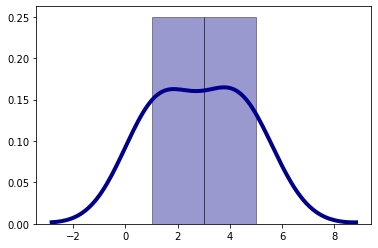

In [133]:
import seaborn as sns

sns.distplot([1,2,1,4,4,5], hist=True, kde=True, 
             bins=int(2), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})